# Homework

1. Train NN model with custom linear architecture on MNIST or on any dataset from Kaggle (image data with resolution not higher than 80x80 pixels - 
[Sign language MNIST](https://www.kaggle.com/datasets/datamunge/sign-language-mnist), 
[A-Z Handwritten Alphabet](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format), etc.)
2. Visualize epoch progress (loss and accuracy curves)
3. Visualize 10 random elements from test set and model results for those elements

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('A_Z Handwritten Data.csv')

In [6]:
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.shape

(372450, 785)

In [8]:
X = data.drop('0', axis=1)
y = data['0']

In [9]:
X

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
letter_dict={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F', 6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N', 14:'O', 15:'P', 16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

In [11]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

In [12]:
class AZDataset(Dataset):
    def __init__(self):
        self.data = pd.read_csv('A_Z Handwritten Data.csv')
        self.X = self.data.drop('0', axis=1).values
        self.y = self.data['0'].values
        self.n_samples=self.X.shape[0]
        self.X= torch.from_numpy(self.X)
        self.X = self.X.reshape((self.X.shape[0], 28, 28))
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

In [13]:
d=AZDataset()

In [14]:
x, y = d[228]
print(x,y)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 107,   0,   0,
          76, 192, 255, 128,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [15]:
d.__len__()

372450

In [16]:
import torch.nn as nn

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [18]:
class AZClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, output_size),
        )

    def forward(self, x):
        x = self.flatten(x)
        x = x.float()
        logits = self.linear_relu_stack(x)
        return logits

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
batch_size = 64

trainset, testset = train_test_split(d)

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=1)

In [21]:
model = AZClassifier(input_size=torch.numel(trainset[0][0]), output_size=len(letter_dict)).to(device)
print(model)

AZClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=26, bias=True)
  )
)


In [22]:
learning_rate = 1e-3
epochs = 10

# Initialize the loss function; also called `criterion`
loss_fn = nn.CrossEntropyLoss()

# Initialize optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [23]:
from tqdm import tqdm

In [24]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch):
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    
    tqdm_loader = tqdm(dataloader, unit="batch", desc=f"Epoch {epoch}", total=len(dataloader))
    for batch, (X, y) in enumerate(tqdm_loader):
        # Compute prediction and loss
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 1000 == 0:
            tqdm_loader.set_postfix(loss=loss.item())


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [25]:
for t in range(epochs):
    train_loop(train_loader, model, loss_fn, optimizer, epoch=t)
    test_loop(test_loader, model, loss_fn)

torch.save(model, 'model.pth')

# OR

torch.save(model.state_dict(), 'model_state.pth')

Epoch 0: 100%|██████████| 4365/4365 [00:30<00:00, 143.99batch/s, loss=0.121]


Test Error: 
 Accuracy: 94.4%, Avg loss: 0.199503 



Epoch 1: 100%|██████████| 4365/4365 [00:30<00:00, 143.91batch/s, loss=0.275] 


Test Error: 
 Accuracy: 96.2%, Avg loss: 0.140628 



Epoch 2: 100%|██████████| 4365/4365 [00:30<00:00, 144.44batch/s, loss=0.0357]


Test Error: 
 Accuracy: 96.8%, Avg loss: 0.117051 



Epoch 3: 100%|██████████| 4365/4365 [00:30<00:00, 142.86batch/s, loss=0.0481]


Test Error: 
 Accuracy: 97.3%, Avg loss: 0.099499 



Epoch 4: 100%|██████████| 4365/4365 [00:31<00:00, 136.62batch/s, loss=0.202]  


Test Error: 
 Accuracy: 97.6%, Avg loss: 0.089366 



Epoch 5: 100%|██████████| 4365/4365 [00:31<00:00, 139.63batch/s, loss=0.0297]


Test Error: 
 Accuracy: 97.8%, Avg loss: 0.082659 



Epoch 6: 100%|██████████| 4365/4365 [00:31<00:00, 138.06batch/s, loss=0.08]   


Test Error: 
 Accuracy: 98.0%, Avg loss: 0.075575 



Epoch 7: 100%|██████████| 4365/4365 [00:31<00:00, 139.14batch/s, loss=0.0263]


Test Error: 
 Accuracy: 98.3%, Avg loss: 0.069104 



Epoch 8: 100%|██████████| 4365/4365 [00:31<00:00, 139.36batch/s, loss=0.0276] 


Test Error: 
 Accuracy: 98.4%, Avg loss: 0.064260 



Epoch 9: 100%|██████████| 4365/4365 [00:31<00:00, 138.62batch/s, loss=0.00456]


Test Error: 
 Accuracy: 98.5%, Avg loss: 0.061300 



In [26]:
loaded_model = torch.load('model.pth').to(device)

In [27]:
loaded_model

AZClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=26, bias=True)
  )
)

In [28]:
import matplotlib.pyplot as plt

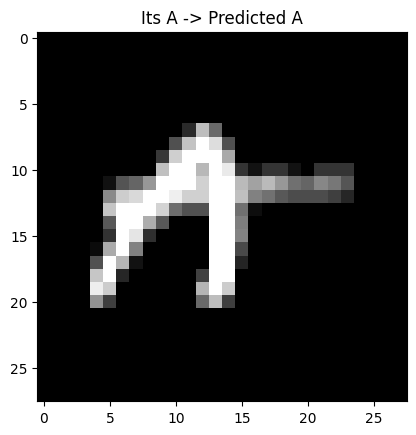

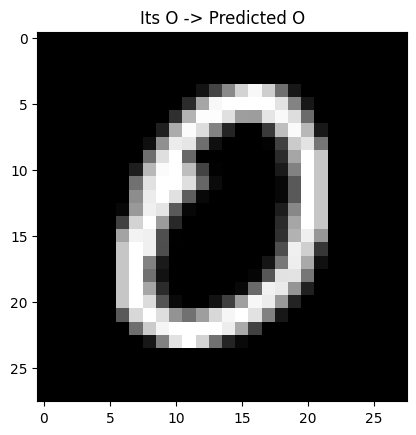

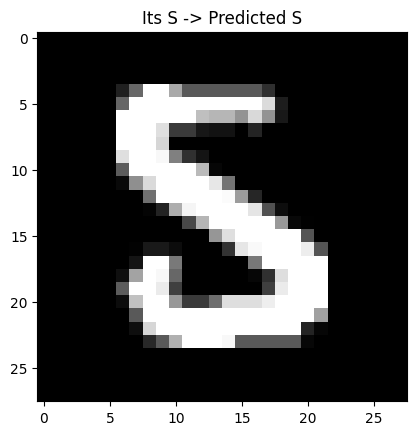

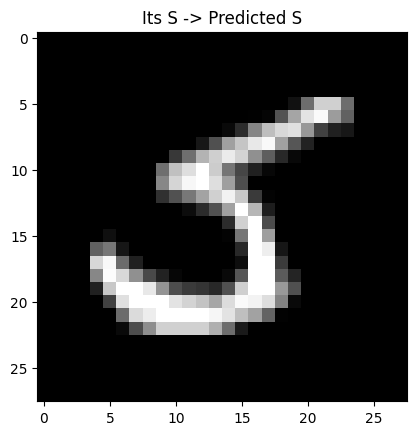

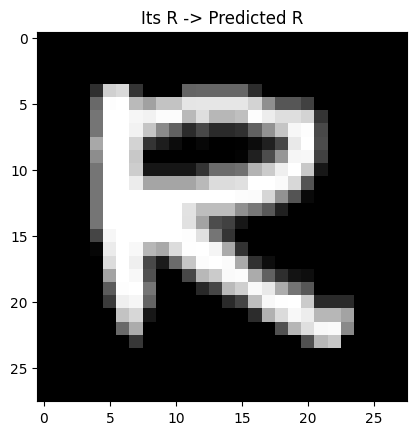

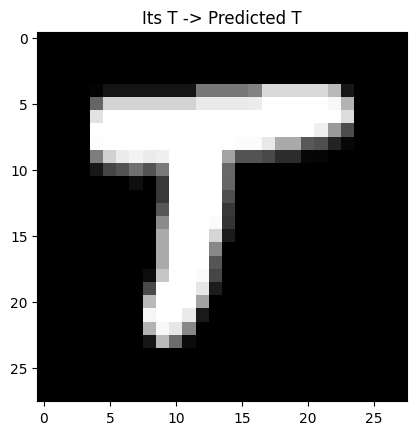

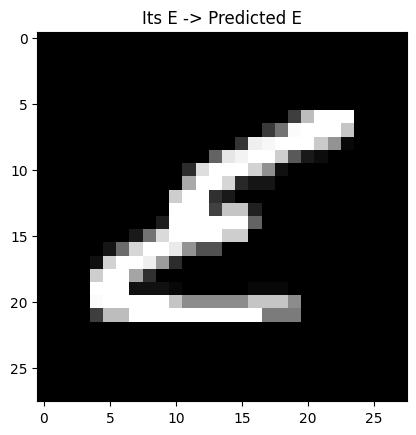

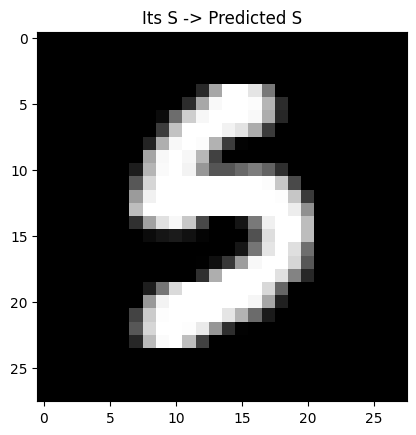

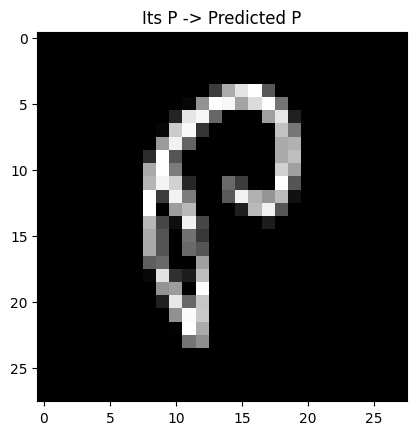

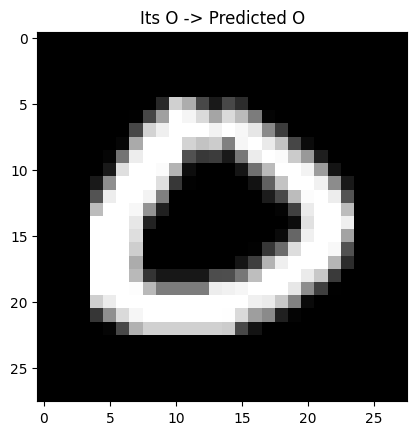

In [29]:
for i in range(10):
    preprocessed_data0 = testset[i][0].clone().detach()  # Use .clone().detach() instead of torch.tensor()
    preprocessed_data = preprocessed_data0.view(1, -1)
    preprocessed_data = preprocessed_data.to(device)
    with torch.no_grad():
        model.eval()
        predictions = model(preprocessed_data)
    predicted_class = torch.argmax(predictions, dim=1).item()

    plt.imshow(preprocessed_data0, cmap='grey')
    plt.title(f"Its {letter_dict[testset[i][1]]} -> Predicted {letter_dict[predicted_class]}")
    plt.show()

In [50]:
from PIL import Image
import torchvision.transforms as transforms

image = Image.open('my_letter.png')

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
])
image_tensor = transform(image)

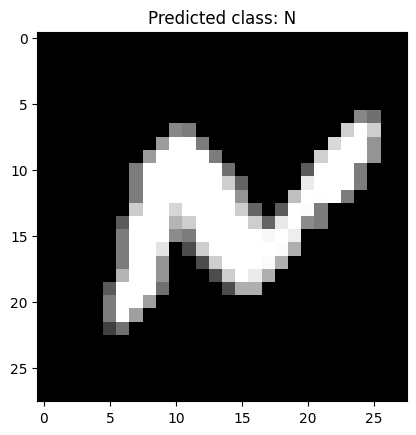

In [51]:
preprocessed_data0 = image_tensor.view(1, -1)

preprocessed_data = preprocessed_data0.to(device)

with torch.no_grad():
    model.eval()
    predictions = model(preprocessed_data)

predicted_class = torch.argmax(predictions, dim=1).item()
print()
plt.imshow(image)
plt.title(f"Predicted class: {letter_dict[predicted_class]}")
plt.show()